In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite, factorial
from numpy import sqrt, pi, exp

In [5]:
hbar = 1
m = 1
omega = 1

In [7]:
x = np.linspace(-4, 4, 1000)
V = 0.5 * m * omega**2 * x**2

In [9]:
def psi(n, x):
    Hn = hermite(n)
    norm = 1.0 / sqrt(2**n * factorial(n)) * (m*omega / (pi*hbar))**0.25
    return norm * exp(-m*omega*x**2/(2*hbar)) * Hn(sqrt(m*omega/hbar)*x)

In [11]:
def energy(n):
    return hbar * omega * (n + 0.5)

<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_332711/376958861.py:11: SyntaxWarning: invalid escape sequence '\h'
  plt.text(4.2, En, f"$E_{n} = {int(2*n+1)}/2 \hbar\omega$", fontsize=12, verticalalignment='center')


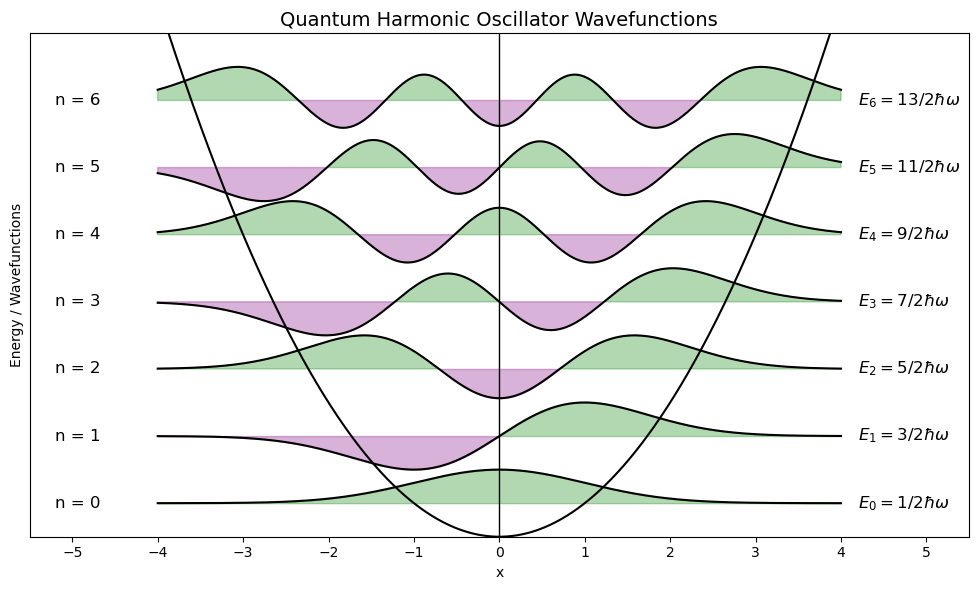

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(x, V, 'k', label="Potential V(x)")
plt.axvline(x=0, color='black', linewidth=1)
for n in range(7):
    psin = psi(n, x)
    En = energy(n)
    psin_shifted = psin / max(abs(psin)) * 0.5 + En
    plt.plot(x, psin_shifted, 'black')
    plt.fill_between(x, En, psin_shifted, where=(psin_shifted > En), color='green', alpha=0.3)
    plt.fill_between(x, En, psin_shifted, where=(psin_shifted < En), color='purple', alpha=0.3)
    plt.text(4.2, En, f"$E_{n} = {int(2*n+1)}/2 \hbar\omega$", fontsize=12, verticalalignment='center')
    plt.text(-5.2, En, f"n = {n}", fontsize=12, verticalalignment='center')

plt.title("Quantum Harmonic Oscillator Wavefunctions", fontsize=14)
plt.xlabel("x")
plt.ylabel("Energy / Wavefunctions")
plt.ylim(0, energy(6) + 1)
plt.xlim(-5.5, 5.5)
plt.grid(False)
plt.xticks(np.arange(-5, 6, 1))
plt.yticks([])
plt.tight_layout()
plt.savefig("QHO_wavefunctions.png", dpi=300)
plt.show()